In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('emissions_reduction_data.csv')
# Display the first few rows
print(data.head())
# Check for missing values
print(data.isnull().sum())
# Handle missing values if necessary
data.fillna(data.mean(), inplace=True)

   energy_efficiency  renewable_ratio  technology_cost  emission_reduction
0          68.727006         0.373641      7569.984799                   0
1          97.535715         0.332912      2660.607960                   0
2          86.599697         0.176154      4119.757249                   0
3          79.932924         0.607267      6969.525732                   1
4          57.800932         0.476624      5338.804101                   0
energy_efficiency     0
renewable_ratio       0
technology_cost       0
emission_reduction    0
dtype: int64


In [15]:
data.shape

(10000, 4)

In [4]:
# Define features and target variable
X = data[['energy_efficiency', 'renewable_ratio', 'technology_cost']]
y = data['emission_reduction']  # 1 for effective reduction, 0 otherwise

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Set number of neighbors
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred 

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.99


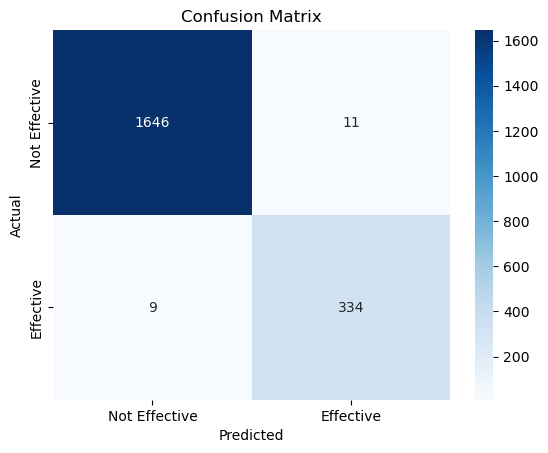

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Effective', 'Effective'], 
            yticklabels=['Not Effective', 'Effective'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Classification Report
print(classification_report(y_test, y_pred, target_names=['Not Effective', 'Effective']))

               precision    recall  f1-score   support

Not Effective       0.99      0.99      0.99      1657
    Effective       0.97      0.97      0.97       343

     accuracy                           0.99      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.99      0.99      0.99      2000



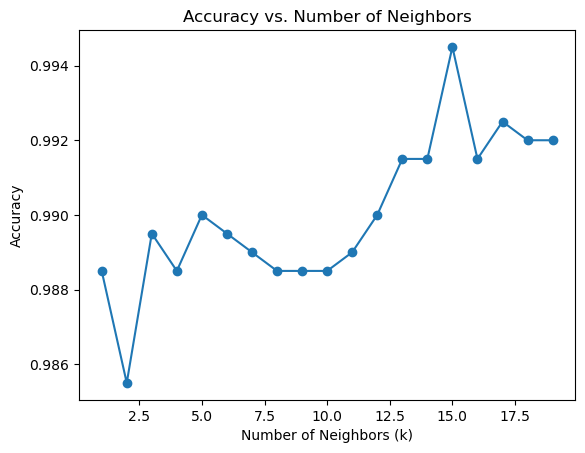

In [14]:
# Trying different values for k
accuracy_scores = []
k_values = range(1, 20)

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. k
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()